In [1]:
!pip install autokeras

  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/148.6 kB ? eta -:--:--
   ----------------------

In [1]:
import tensorflow as tf
import os
import autokeras as ak
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
import tensorflow.keras.backend as K

Using TensorFlow backend


In [25]:
# K.clear_session()

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
# Directory containing the image data
data_dir = r'C:\Users\Marvin\Documents\WBS\Final_Project\Data\data' 

In [6]:
class_names = os.listdir(data_dir)
num_classes = len(os.listdir(data_dir))

In [7]:
num_classes

62

In [9]:
batch_size = 32
image_size = (256, 256)

In [10]:
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=42,
    image_size=image_size,
    batch_size=batch_size
)

Found 94326 files belonging to 62 classes.


In [11]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

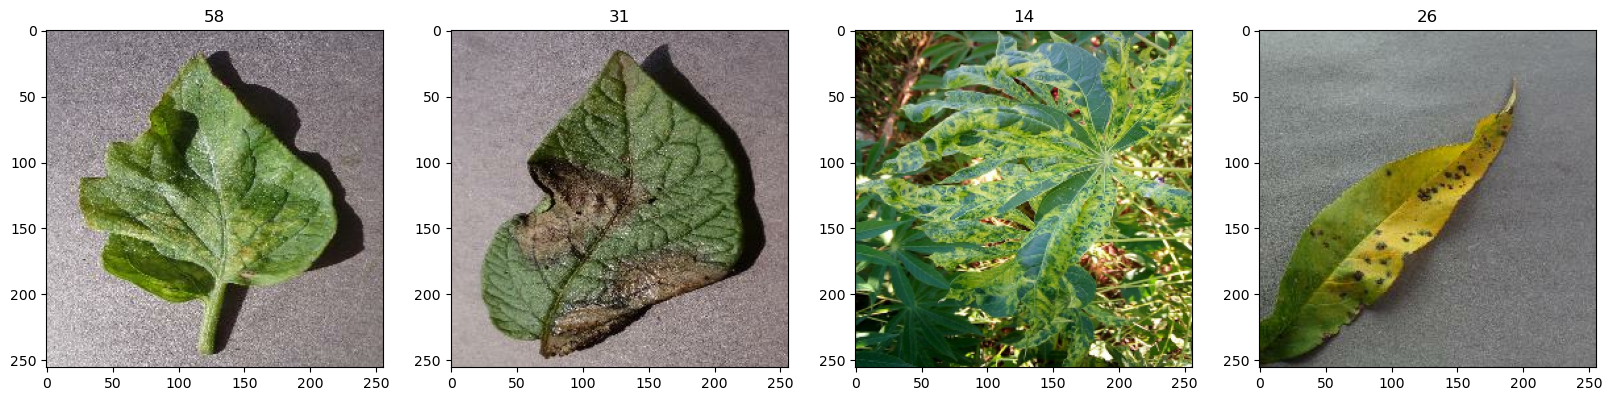

In [12]:
# Display sample images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data_scaled = data.map(lambda x,y: (x/255, tf.one_hot(y, num_classes)))

In [14]:
train_size = int(0.7 * len(data))
val_size = int(0.2 * len(data))
test_size = len(data) - train_size - val_size

In [15]:
train_data = data_scaled.take(train_size)
val_data = data_scaled.skip(train_size).take(val_size)
test_data = data_scaled.skip(train_size + val_size).take(test_size)

In [16]:
# Initialize ImageClassifier
clf = ak.ImageClassifier(overwrite=True, max_trials=10)

In [17]:
# Train the classifier
clf.fit(train_data, epochs=50, validation_data=val_data)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
vanilla           |vanilla           |image_block_1/block_type
True              |True              |image_block_1/normalize
False             |False             |image_block_1/augment
3                 |3                 |image_block_1/conv_block_1/kernel_size
1                 |1                 |image_block_1/conv_block_1/num_blocks
2                 |2                 |image_block_1/conv_block_1/num_layers
True              |True              |image_block_1/conv_block_1/max_pooling
False             |False             |image_block_1/conv_block_1/separable
0.25              |0.25              |image_block_1/conv_block_1/dropout
32                |32                |image_block_1/conv_block_1/filters_0_0
64                |64                |image_block_1/conv_block_1/filters_0_1
flatten           |flatten           |classification_head_1/spatial_reduction_1/reduction_type
0.5               |0.5          

KeyboardInterrupt: 

In [ ]:
# Evaluate the classifier
results = clf.evaluate(test_data)

In [ ]:
# Print the results
print(results)

In [ ]:
# Get the best model
best_model = clf.export_model()

In [ ]:
# Save the best model
best_model.save('best_model_autokeras', save_format='tf')